In [287]:
import pandas as pd
import numpy as np
import scipy as snp
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
df=pd.read_csv('/content/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [289]:
new_df=df[['PassengerId','Survived','Pclass']]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [290]:
new_df.reset_index(inplace = True, drop = True)


In [291]:
new_df

,PassengerId,Survived,Pclass
0,892,0,3
1,893,1,3
2,894,0,2
3,895,0,3
4,896,1,3
...,...,...,...
413,1305,0,3
414,1306,1,1
415,1307,0,3
416,1308,0,3


In [292]:
new_df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

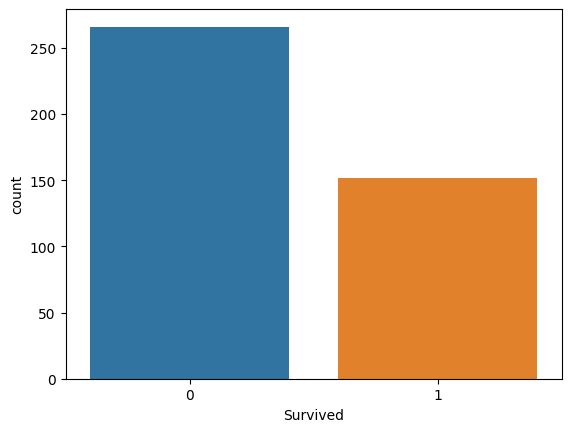

In [293]:
sns.countplot(data=new_df,x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

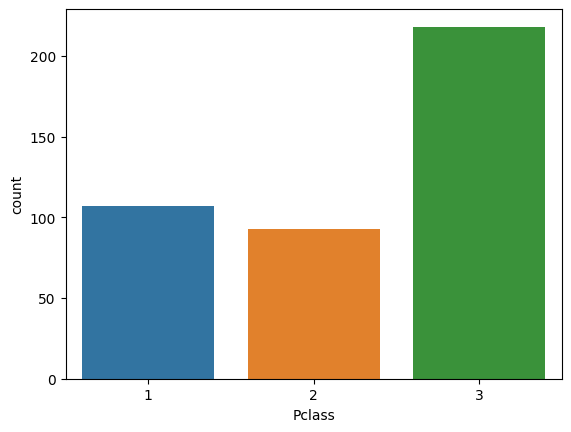

In [294]:
sns.countplot(data=new_df,x='Pclass')

In [295]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [296]:
from sklearn.impute import SimpleImputer

In [297]:
columns=df.columns
si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
titanic_df=pd.DataFrame(si.fit_transform(df),columns=columns)

In [298]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [299]:
from sklearn.preprocessing import LabelEncoder

In [300]:
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

In [301]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0,B57 B59 B63 B66,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2


In [302]:

titanic_df.drop(['Name','Cabin','PassengerId','Ticket'],inplace=True,axis=1)

In [303]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [304]:
x=titanic_df.drop('Survived',axis=1)
y=titanic_df.Survived

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [307]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (334, 7)
X_test shape: (84, 7)


In [308]:
from sklearn.ensemble import RandomForestClassifier

In [312]:
print(y_train.value_counts())
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)


0    216
1    118
Name: Survived, dtype: int64


In [313]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [314]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [319]:
y_pred = clf.predict(x_test)
prediction_df=pd.DataFrame({'survived or not survived':y_pred})
prediction_df.head()



,survived or not survived
0,0
1,1
2,0
3,0
4,1
